In [35]:
import xarray as xr
from matplotlib import pyplot as plt
import numpy as np

import pymeteo
import metpy

import cartopy
import cartopy.mpl.geoaxes

from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from metpy import plots

from pymeteo.data import acars
from goes2go.data import goes_latest, goes_nearesttime, goes_timerange
import goes2go.tools as goestools

import goes2go

from xmovie import Movie
import pyart

%matplotlib inline


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



/Users/scollis/miniconda3/envs/pyart-simple/lib/python3.7/site-packages/mpl_toolkits/basemap/__init__.py:33: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  _matplotlib_version = LooseVersion(_matplotlib_version)
/Users/scollis/miniconda3/envs/pyart-simple/lib/python3.7/site-packages/mpl_toolkits/basemap/__init__.py:34: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  _mpl_required_version = LooseVersion('0.98')
/Users/scollis/miniconda3/envs/pyart-simple/lib/python3.7/site-packages/mpl_toolkits/basemap/__init__.py:33: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  _matplotlib_version = LooseVersion(_matplotlib_version)
/Users/scollis/miniconda3/envs/pyart-simple/lib/python3.7/site-packages/mpl_toolkits/basemap/__init__.py:34: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  _mpl_required_version = Loo

ImportError: cannot import name 'utime' from 'cftime' (/Users/scollis/miniconda3/envs/pyart-simple/lib/python3.7/site-packages/cftime/__init__.py)

In [7]:
goes_nearesttime?

In [2]:
infile = '/Users/scollis/data/

In [3]:
testxr = xr.load_dataset(infile)

FileNotFoundError: [Errno 2] No such file or directory: b'/Users/scollis/Downloads/2019/218/15/OR_ABI-L2-CMIPM2-M6C13_G16_s20192181511281_e20192181511351_c20192181511406.nc'

In [ ]:
testxr No such file or directory: b'/Users/scollis/Downloads/2019/218/15/OR_ABI-L2-CMIPM2-M6C13_G16_s20192181511281_e20192181511351_c20192181511406.nc'

In [ ]:
testxr.CMI.plot()

In [9]:
G_ABI = goes_nearesttime('2022 05 12 17:17', satellite='G16', product='ABI')

 _______________________________
 | Satellite: noaa-goes16      |
 |   Product: ABI-L2-MCMIPC    |
 |    Domain: C                |
📦 Finished downloading [1] files to [/Users/scollis/data/noaa-goes16/ABI-L2-MCMIPC].                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

In [10]:
G_ABI

<xarray.Dataset>
Dimensions:                                 (y: 1500, x: 2500, number_of_time_bounds: 2, number_of_image_bounds: 2, band: 1)
Coordinates: (12/41)
    t                                       datetime64[ns] ...
  * y                                       (y) float32 0.1282 ... 0.04427
  * x                                       (x) float32 -0.1013 ... 0.03861
    y_image                                 float32 ...
    x_image                                 float32 ...
    band_wavelength_C01                     (band) float32 ...
    ...                                      ...
    band_id_C15                             (band) int8 ...
    band_id_C16                             (band) int8 ...
    dataset_name                            <U74 'OR_ABI-L2-MCMIPC-M6_G16_s20...
    date_created                            <U22 '2022-05-12T17:19:05.8Z'
    time_coverage_start                     <U22 '2022-05-12T17:16:17.4Z'
    time_coverage_end                       <U22 '2022-05-12T17:18:54.7Z'
Dimensions without coordinates: number_of_time_bounds, number_of_image_bounds, band
Data variables: (12/125)
    CMI_C01                                 (y, x) float32 ...
    DQF_C01                                 (y, x) float32 ...
    CMI_C02                                 (y, x) float32 ...
    DQF_C02                                 (y, x) float32 ...
    CMI_C03                                 (y, x) float32 ...
    DQF_C03                                 (y, x) float32 ...
    ...                                      ...
    std_dev_brightness_temperature_C16      float32 ...
    percent_uncorrectable_GRB_errors        float32 ...
    percent_uncorrectable_L0_errors         float32 ...
    dynamic_algorithm_input_data_container  int32 ...
    algorithm_product_version_container     int32 ...
    filename                                <U112 'noaa-goes16/ABI-L2-MCMIPC/...
Attributes: (12/26)
    naming_authority:          gov.nesdis.noaa
    Conventions:               CF-1.7
    Metadata_Conventions:      Unidata Dataset Discovery v1.0
    standard_name_vocabulary:  CF Standard Name Table (v35, 20 July 2016)
    institution:               DOC/NOAA/NESDIS > U.S. Department of Commerce,...
    project:                   GOES
    ...                        ...
    cdm_data_type:             Image
    processing_level:          National Aeronautics and Space Administration ...
    timeline_id:               ABI Mode 6
    production_data_source:    Realtime
    id:                        c3be5abe-41df-4327-a6ba-1c736c572a88
    path:                      ['noaa-goes16/ABI-L2-MCMIPC/2022/132/17/OR_ABI...

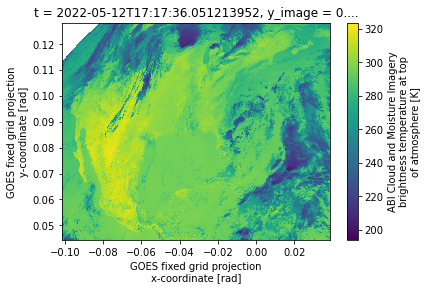

In [11]:
G_ABI.CMI_C13.plot()

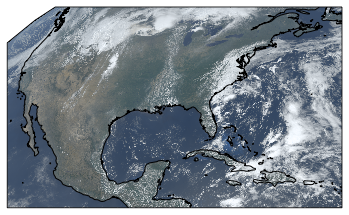

In [12]:
ax = plt.subplot(projection=G_ABI.rgb.crs)
ax.imshow(G_ABI.rgb.TrueColor(), **G_ABI.rgb.imshow_kwargs)
ax.coastlines()

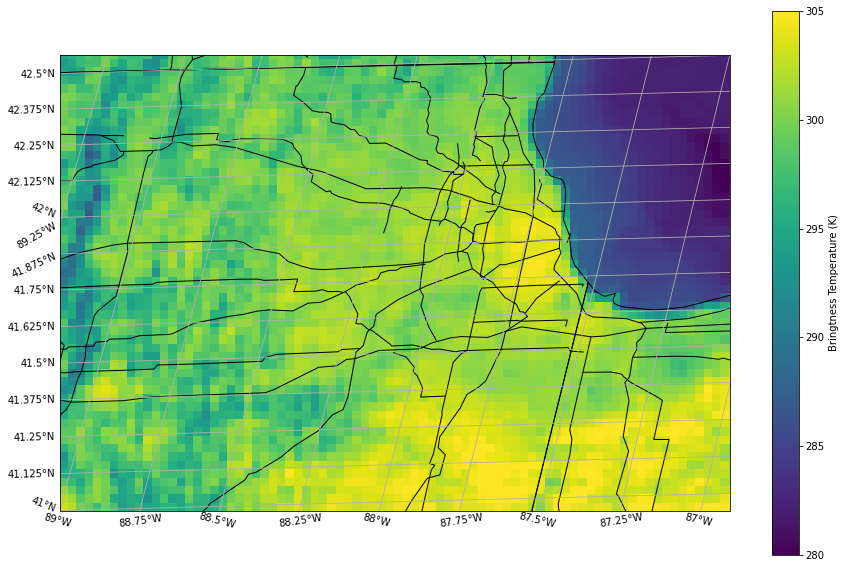

In [16]:
figme = plt.figure(figsize=[15,10])
ax = plt.subplot(projection=G_ABI.rgb.crs)
mp = ax.imshow(G_ABI.CMI_C13, vmin=280., vmax=305,  **G_ABI.rgb.imshow_kwargs)
ax.coastlines()
gl = ax.gridlines(xlocs=np.linspace(-90,-80,41), ylocs=np.linspace(40.,45.,41),draw_labels=True)
ax.set_extent([-89.0,-87.25,41.,42.5])
ax.add_feature(cartopy.feature.LAKES, zorder=0)
ax.add_feature(cartopy.feature.STATES)
ax.add_feature(cartopy.feature.NaturalEarthFeature('cultural', 'roads', '10m'), facecolor='none',
              edgecolor='k')

gl.top_labels = False
gl.right_labels = False
gl.left_labels = True


cb = plt.colorbar(mappable = mp)
cb.set_label('Bringtness Temperature (K)')

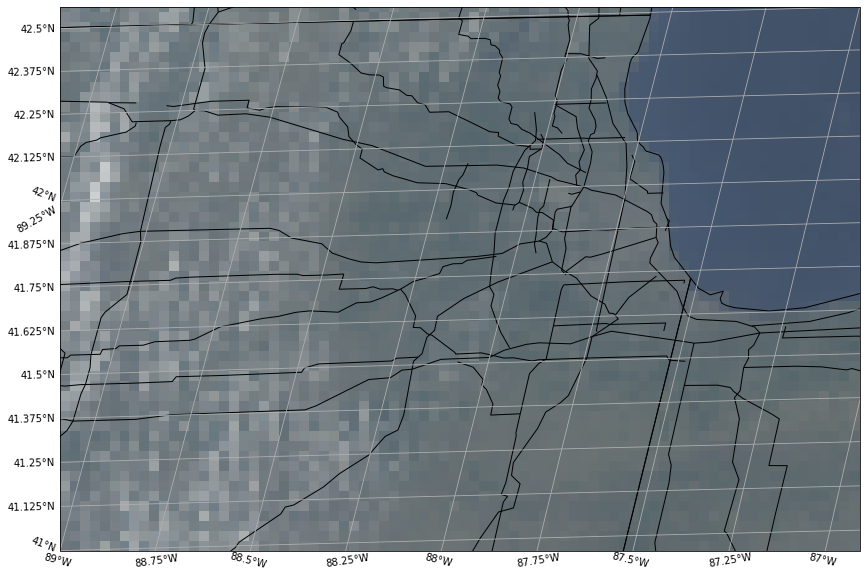

In [31]:
figme = plt.figure(figsize=[15,10])
ax = plt.subplot(projection=G_ABI.rgb.crs)
mp = ax.imshow(G_ABI.rgb.TrueColor(), **G_ABI.rgb.imshow_kwargs)
ax.coastlines()
gl = ax.gridlines(xlocs=np.linspace(-90,-80,41), ylocs=np.linspace(40.,45.,41),draw_labels=True)
ax.set_extent([-89.0,-87.25,41.,42.5])
ax.add_feature(cartopy.feature.LAKES, zorder=0)
ax.add_feature(cartopy.feature.STATES)
ax.add_feature(cartopy.feature.NaturalEarthFeature('cultural', 'roads', '10m'), facecolor='none',
              edgecolor='k')

gl.top_labels = False
gl.right_labels = False
gl.left_labels = True


In [32]:
G_ABI

In [133]:
txr = goes_timerange(satellite='G16', product='ABI', recent='22H')

 _______________________________
 | Satellite: noaa-goes16      |
 |   Product: ABI-L2-MCMIPC    |
 |    Domain: C                |
📦 Finished downloading [238] files to [/Users/scollis/data/noaa-goes16/ABI-L2-MCMIPC].                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

In [134]:
ccr = xr.open_mfdataset('/Users/scollis/data/noaa-goes16/ABI-L2-MCMIPC/2022/13*/*/OR_ABI-L2-MCMIPC-M6_G16_s*',
                       concat_dim='t', combine='nested')

In [136]:
ccr

<xarray.Dataset>
Dimensions:                                 (t: 358, y: 1500, x: 2500, number_of_time_bounds: 2, number_of_image_bounds: 2, band: 1)
Coordinates: (12/37)
  * t                                       (t) datetime64[ns] 2022-05-12T06:...
  * y                                       (y) float32 0.1282 ... 0.04427
  * x                                       (x) float32 -0.1013 ... 0.03861
    y_image                                 float32 0.08624
    x_image                                 float32 -0.03136
    band_wavelength_C01                     (band) float32 dask.array<chunksize=(1,), meta=np.ndarray>
    ...                                      ...
    band_id_C11                             (band) int8 dask.array<chunksize=(1,), meta=np.ndarray>
    band_id_C12                             (band) int8 dask.array<chunksize=(1,), meta=np.ndarray>
    band_id_C13                             (band) int8 dask.array<chunksize=(1,), meta=np.ndarray>
    band_id_C14                             (band) int8 dask.array<chunksize=(1,), meta=np.ndarray>
    band_id_C15                             (band) int8 dask.array<chunksize=(1,), meta=np.ndarray>
    band_id_C16                             (band) int8 dask.array<chunksize=(1,), meta=np.ndarray>
Dimensions without coordinates: number_of_time_bounds, number_of_image_bounds, band
Data variables: (12/124)
    CMI_C01                                 (t, y, x) float32 dask.array<chunksize=(1, 1500, 2500), meta=np.ndarray>
    DQF_C01                                 (t, y, x) float32 dask.array<chunksize=(1, 1500, 2500), meta=np.ndarray>
    CMI_C02                                 (t, y, x) float32 dask.array<chunksize=(1, 1500, 2500), meta=np.ndarray>
    DQF_C02                                 (t, y, x) float32 dask.array<chunksize=(1, 1500, 2500), meta=np.ndarray>
    CMI_C03                                 (t, y, x) float32 dask.array<chunksize=(1, 1500, 2500), meta=np.ndarray>
    DQF_C03                                 (t, y, x) float32 dask.array<chunksize=(1, 1500, 2500), meta=np.ndarray>
    ...                                      ...
    mean_brightness_temperature_C16         (t) float64 261.1 261.1 ... 263.4
    std_dev_brightness_temperature_C16      (t) float64 16.26 16.25 ... 14.7
    percent_uncorrectable_GRB_errors        (t) float64 0.0 0.0 0.0 ... 0.0 0.0
    percent_uncorrectable_L0_errors         (t) float64 0.0 0.0 0.0 ... 0.0 0.0
    dynamic_algorithm_input_data_container  (t) int32 -2147483647 ... -214748...
    algorithm_product_version_container     (t) int32 -2147483647 ... -214748...
Attributes: (12/29)
    naming_authority:          gov.nesdis.noaa
    Conventions:               CF-1.7
    Metadata_Conventions:      Unidata Dataset Discovery v1.0
    standard_name_vocabulary:  CF Standard Name Table (v35, 20 July 2016)
    institution:               DOC/NOAA/NESDIS > U.S. Department of Commerce,...
    project:                   GOES
    ...                        ...
    date_created:              2022-05-12T06:54:05.0Z
    time_coverage_start:       2022-05-12T06:51:17.3Z
    time_coverage_end:         2022-05-12T06:53:55.2Z
    timeline_id:               ABI Mode 6
    production_data_source:    Realtime
    id:                        f01e3d4b-3594-480f-a91f-491f6a07812e

In [137]:
my_proj = goestools.abi_crs(ccr)
ext = [my_proj[1].data[0], my_proj[1].data[-1], my_proj[2].data[-1], my_proj[2].data[0]]

In [138]:
ccr.CMI_C13.isel(t=0)

<xarray.DataArray 'CMI_C13' (y: 1500, x: 2500)>
dask.array<getitem, shape=(1500, 2500), dtype=float32, chunksize=(1500, 2500), chunktype=numpy.ndarray>
Coordinates:
    t        datetime64[ns] 2022-05-12T06:52:36.315172992
  * y        (y) float32 0.1282 0.1282 0.1281 0.128 ... 0.04438 0.04432 0.04427
  * x        (x) float32 -0.1013 -0.1013 -0.1012 ... 0.0385 0.03856 0.03861
    y_image  float32 0.08624
    x_image  float32 -0.03136
Attributes:
    long_name:              ABI Cloud and Moisture Imagery brightness tempera...
    standard_name:          toa_brightness_temperature
    sensor_band_bit_depth:  12
    valid_range:            [   0 4095]
    units:                  K
    resolution:             y: 0.000056 rad x: 0.000056 rad
    grid_mapping:           goes_imager_projection
    cell_methods:           t: point area: point
    ancillary_variables:    DQF_C13

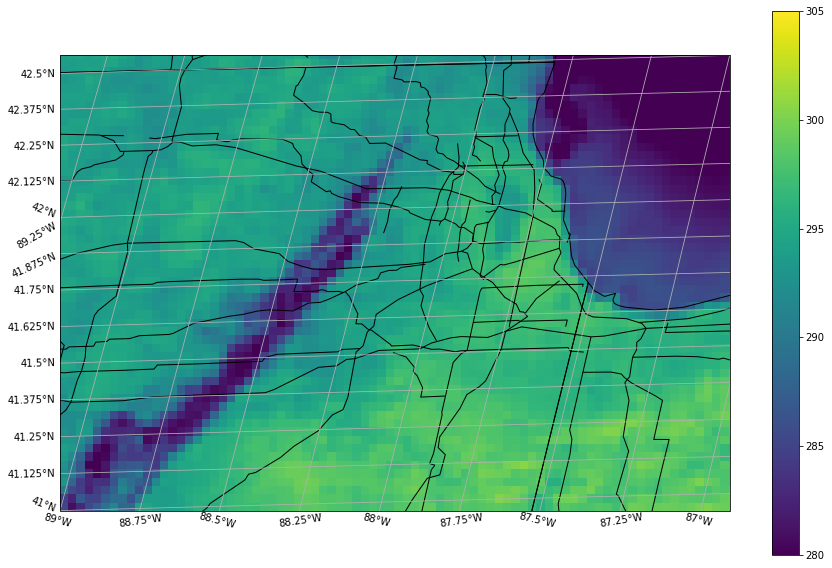

In [139]:
figme = plt.figure(figsize=[15,10])
ax = plt.subplot(projection=my_proj[0])
mp = ax.imshow(ccr.CMI_C13.isel(t=-1), vmin=280., vmax=305, transform = my_proj[0], extent=ext)
ax.coastlines()
gl = ax.gridlines(xlocs=np.linspace(-90,-80,41), ylocs=np.linspace(40.,45.,41),draw_labels=True)
ax.set_extent([-89.0,-87.25,41.,42.5])
ax.add_feature(cartopy.feature.LAKES, zorder=0)
ax.add_feature(cartopy.feature.STATES)
ax.add_feature(cartopy.feature.NaturalEarthFeature('cultural', 'roads', '10m'), facecolor='none',
              edgecolor='k')

gl.top_labels = False
gl.right_labels = False
gl.left_labels = True


plt.colorbar(mappable = mp)

In [140]:
def custom_plotfunc(ds, fig, tt, *args, **kwargs):
    my_proj = goestools.abi_crs(ds)
    ext = [my_proj[1].data[0], my_proj[1].data[-1], my_proj[2].data[-1], my_proj[2].data[0]]
    
    
    projection = my_proj[0]

    map_panel_axes = [0.08, 0.08, .75, .80]

    ax = fig.add_axes(map_panel_axes, projection=projection)
    mp = ax.imshow(ds.CMI_C13.isel(t=tt), vmin=280., vmax=305, transform = projection, extent=ext)
    ax.coastlines()
    gl = ax.gridlines(xlocs=np.linspace(-90,-80,41), ylocs=np.linspace(40.,45.,41),draw_labels=True)
    ax.set_extent([-89.0,-87.25,41.,42.5])
    ax.add_feature(cartopy.feature.LAKES, zorder=0)
    ax.add_feature(cartopy.feature.STATES)
    ax.add_feature(cartopy.feature.NaturalEarthFeature('cultural', 'roads', '10m'), facecolor='none',
                  edgecolor='k')

    gl.top_labels = False
    gl.right_labels = False
    gl.left_labels = True
    plt.colorbar(mappable = mp)
    return None, None

(None, None)

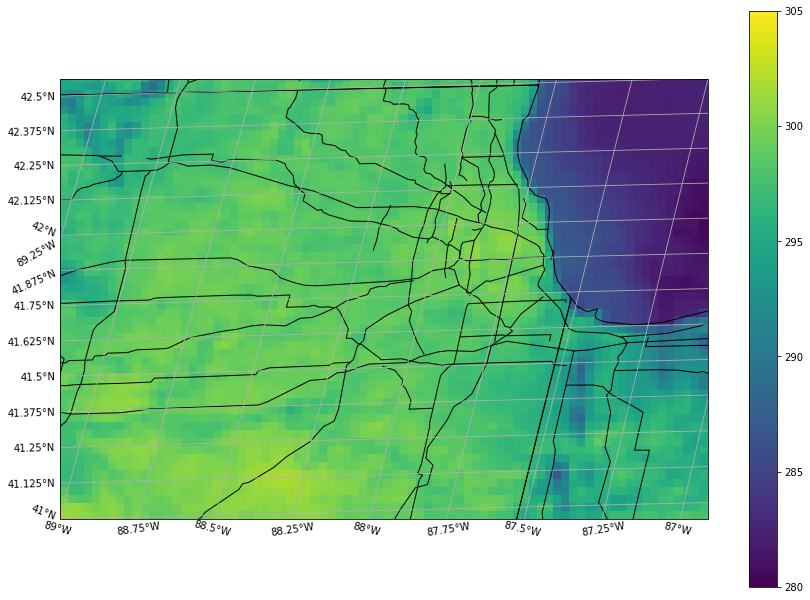

In [141]:
figme = plt.figure(figsize=[15,10])
custom_plotfunc(ccr, figme, 100)

In [142]:
mov_parallel = Movie(ccr.chunk({'t':1}),
                     custom_plotfunc, input_check=False, 
                     dpi=150, framedim='t')#, dpi=300, pixelwidth=4800, pixelheight=1980,)

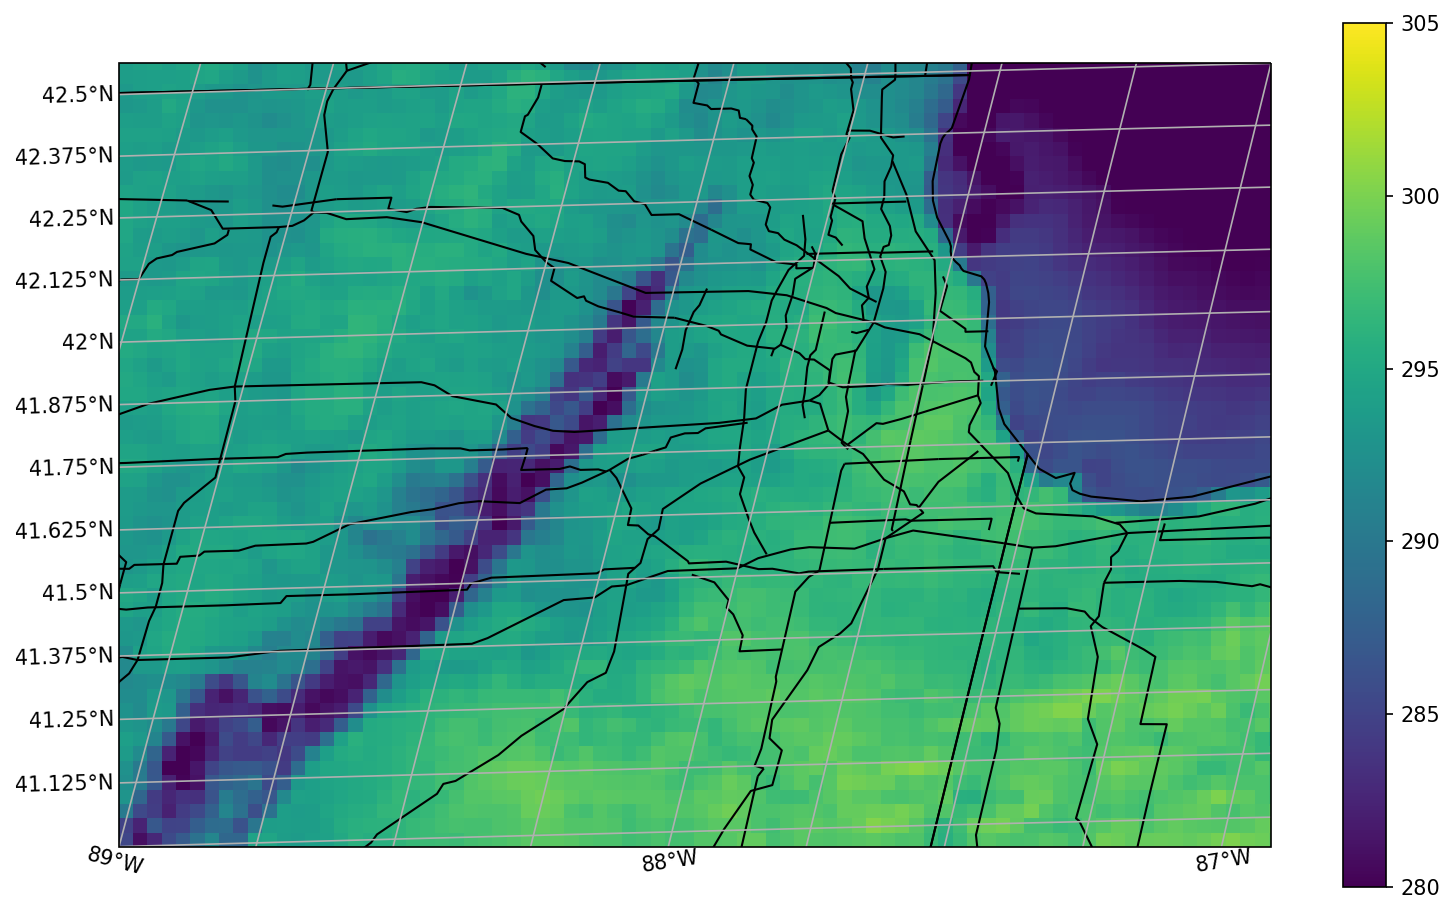

In [144]:
mov_parallel.preview(-1)

In [145]:
mov_parallel.save(
    'goes_parallel2.mov',
    overwrite_existing=True,
    gif_resolution_factor=2.0,framerate=5
)

Movie created at goes_parallel2.mov


In [102]:
mov_parallel.save?

In [52]:
LG_ABI = goes_latest(satellite='G16', product='ABI')

 _______________________________
 | Satellite: noaa-goes16      |
 |   Product: ABI-L2-MCMIPC    |
 |    Domain: C                |
📦 Finished downloading [1] files to [/Users/scollis/data/noaa-goes16/ABI-L2-MCMIPC].                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

/Users/scollis/miniconda3/envs/pyart-simple/lib/python3.7/site-packages/xarray/backends/netCDF4_.py:393: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  attributes = {k: var.getncattr(k) for k in var.ncattrs()}
/Users/scollis/miniconda3/envs/pyart-simple/lib/python3.7/site-packages/xarray/backends/netCDF4_.py:393: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  attributes = {k: var.getncattr(k) for k in var.ncattrs()}
/Users/scollis/miniconda3/envs/pyart-simple/lib/python3.7/site-packages/xarray/backends/netCDF4_.py:393: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  attributes = {k: var.getncattr(k) for k in var.ncattrs()}
/Users/scollis/miniconda3/envs/pyart-simple/lib/python3.7/site-packages/xarray/backends/netCDF4_.py:393: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  attributes = {k: var.getncattr(k) for k in var.ncattrs()}
/Users/scollis/miniconda3/envs/pyart-simple/lib/python3.7/site-p

/Users/scollis/miniconda3/envs/pyart-simple/lib/python3.7/site-packages/xarray/core/pycompat.py:22: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  duck_array_version = LooseVersion(duck_array_module.__version__)
/Users/scollis/miniconda3/envs/pyart-simple/lib/python3.7/site-packages/xarray/core/pycompat.py:22: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  duck_array_version = LooseVersion(duck_array_module.__version__)
/Users/scollis/miniconda3/envs/pyart-simple/lib/python3.7/site-packages/xarray/core/pycompat.py:22: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  duck_array_version = LooseVersion(duck_array_module.__version__)


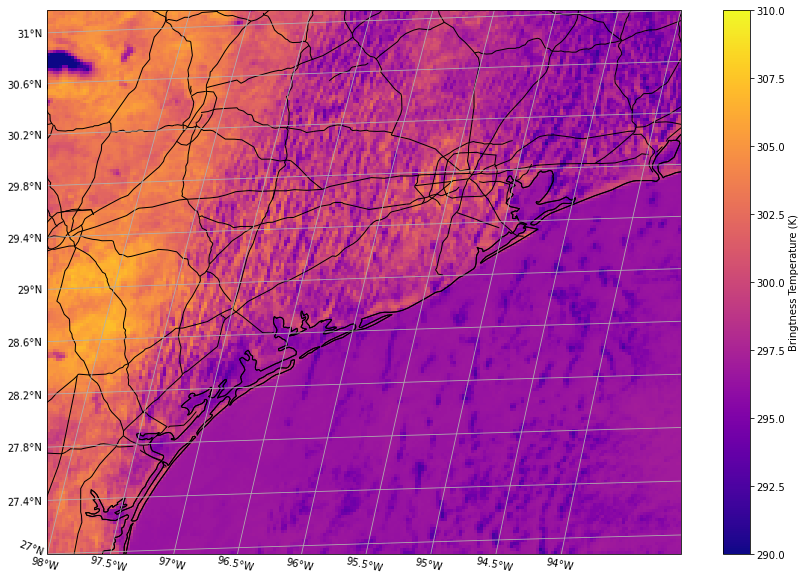

In [53]:
figme = plt.figure(figsize=[15,10])
ax = plt.subplot(projection=G_ABI.rgb.crs)
mp = ax.imshow(LG_ABI.CMI_C13, vmin=290., vmax=310, cmap = 'plasma', **LG_ABI.rgb.imshow_kwargs)
ax.coastlines()
ax.set_extent([-98, -94, 31, 27])

gl = ax.gridlines(xlocs=np.linspace(-98,-94,9), ylocs=np.linspace(27.,31.,11),draw_labels=True)

gl.top_labels = False
gl.right_labels = False
gl.left_labels = True


ax.add_feature(cartopy.feature.LAKES, zorder=0)
ax.add_feature(cartopy.feature.STATES)
ax.add_feature(cartopy.feature.NaturalEarthFeature('cultural', 'roads', '10m'), facecolor='none',
              edgecolor='k')

gl.top_labels = False
gl.right_labels = False
gl.left_labels = True


cb = plt.colorbar(mappable = mp)
cb.set_label('Bringtness Temperature (K)')



/Users/scollis/miniconda3/envs/pyart-simple/lib/python3.7/site-packages/xarray/core/pycompat.py:22: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  duck_array_version = LooseVersion(duck_array_module.__version__)
/Users/scollis/miniconda3/envs/pyart-simple/lib/python3.7/site-packages/xarray/core/pycompat.py:22: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  duck_array_version = LooseVersion(duck_array_module.__version__)
/Users/scollis/miniconda3/envs/pyart-simple/lib/python3.7/site-packages/xarray/core/pycompat.py:22: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  duck_array_version = LooseVersion(duck_array_module.__version__)
/Users/scollis/miniconda3/envs/pyart-simple/lib/python3.7/site-packages/xarray/core/pycompat.py:22: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  duck_array_version = Loos

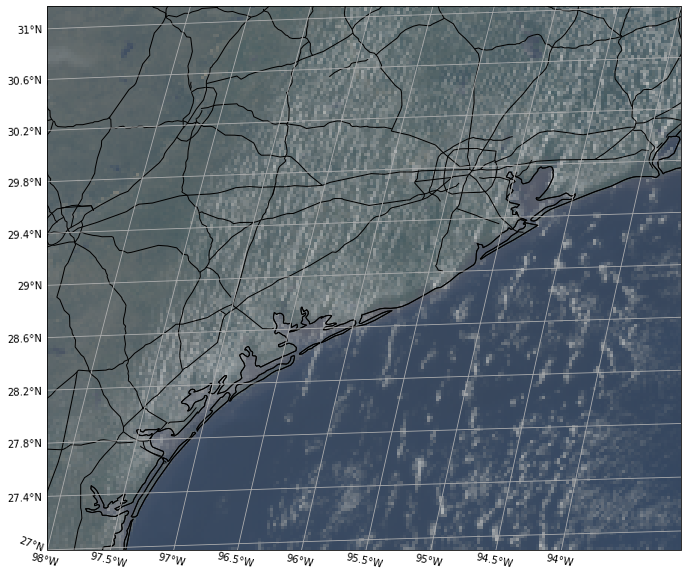

In [54]:
figme = plt.figure(figsize=[15,10])
ax = plt.subplot(projection=G_ABI.rgb.crs)
mp = ax.imshow(LG_ABI.rgb.TrueColor(), **LG_ABI.rgb.imshow_kwargs)
ax.coastlines()

ax.set_extent([-98, -94, 31, 27])

gl = ax.gridlines(xlocs=np.linspace(-98,-94,9), ylocs=np.linspace(27.,31.,11),draw_labels=True)

gl.top_labels = False
gl.right_labels = False
gl.left_labels = True


ax.add_feature(cartopy.feature.LAKES, zorder=0)
ax.add_feature(cartopy.feature.STATES)
ax.add_feature(cartopy.feature.NaturalEarthFeature('cultural', 'roads', '10m'), facecolor='none',
              edgecolor='k')

gl.top_labels = False
gl.right_labels = False
gl.left_labels = True


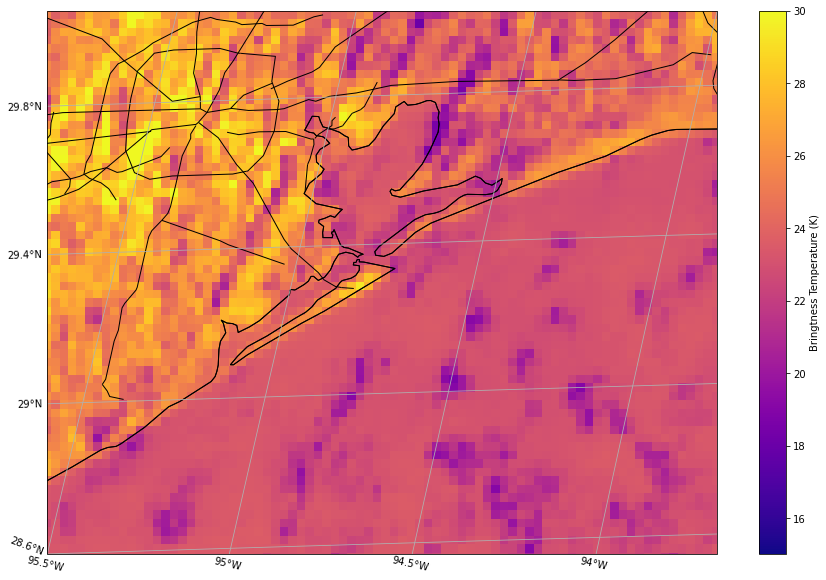

In [55]:
figme = plt.figure(figsize=[15,10])
ax = plt.subplot(projection=G_ABI.rgb.crs)
mp = ax.imshow(LG_ABI.CMI_C13 - 273.15, vmin=15, vmax=30, cmap = 'plasma', **LG_ABI.rgb.imshow_kwargs)
ax.coastlines()
ax.set_extent([-95.5, -94, 30, 28.6])

gl = ax.gridlines(xlocs=np.linspace(-98,-94,9), ylocs=np.linspace(27.,31.,11),draw_labels=True)

gl.top_labels = False
gl.right_labels = False
gl.left_labels = True


ax.add_feature(cartopy.feature.LAKES, zorder=0)
ax.add_feature(cartopy.feature.STATES)
ax.add_feature(cartopy.feature.NaturalEarthFeature('cultural', 'roads', '10m'), facecolor='none',
              edgecolor='k')

gl.top_labels = False
gl.right_labels = False
gl.left_labels = True


cb = plt.colorbar(mappable = mp)
cb.set_label('Bringtness Temperature (K)')



In [65]:
LG_ABI = goes_nearesttime('2022 05 29 13:00', satellite='G16', product='ABI')

 _______________________________
 | Satellite: noaa-goes16      |
 |   Product: ABI-L2-MCMIPC    |
 |    Domain: C                |
📦 Finished downloading [1] files to [/Users/scollis/data/noaa-goes16/ABI-L2-MCMIPC].                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

/Users/scollis/miniconda3/envs/pyart-simple/lib/python3.7/site-packages/xarray/backends/netCDF4_.py:393: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  attributes = {k: var.getncattr(k) for k in var.ncattrs()}
/Users/scollis/miniconda3/envs/pyart-simple/lib/python3.7/site-packages/xarray/backends/netCDF4_.py:393: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  attributes = {k: var.getncattr(k) for k in var.ncattrs()}
/Users/scollis/miniconda3/envs/pyart-simple/lib/python3.7/site-packages/xarray/backends/netCDF4_.py:393: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  attributes = {k: var.getncattr(k) for k in var.ncattrs()}
/Users/scollis/miniconda3/envs/pyart-simple/lib/python3.7/site-packages/xarray/backends/netCDF4_.py:393: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  attributes = {k: var.getncattr(k) for k in var.ncattrs()}
/Users/scollis/miniconda3/envs/pyart-simple/lib/python3.7/site-p

/Users/scollis/miniconda3/envs/pyart-simple/lib/python3.7/site-packages/xarray/core/pycompat.py:22: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  duck_array_version = LooseVersion(duck_array_module.__version__)
/Users/scollis/miniconda3/envs/pyart-simple/lib/python3.7/site-packages/xarray/core/pycompat.py:22: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  duck_array_version = LooseVersion(duck_array_module.__version__)
/Users/scollis/miniconda3/envs/pyart-simple/lib/python3.7/site-packages/xarray/core/pycompat.py:22: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  duck_array_version = LooseVersion(duck_array_module.__version__)


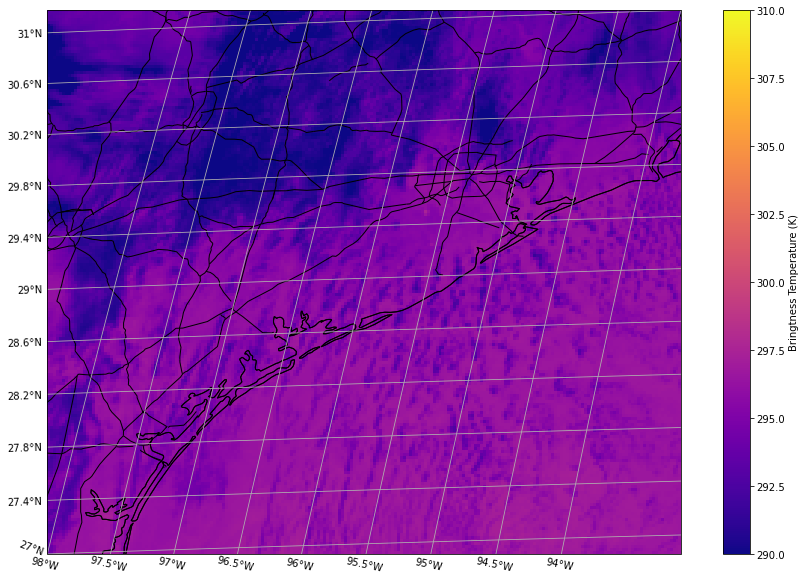

In [66]:
figme = plt.figure(figsize=[15,10])
ax = plt.subplot(projection=G_ABI.rgb.crs)
mp = ax.imshow(LG_ABI.CMI_C13, vmin=290., vmax=310, cmap = 'plasma', **LG_ABI.rgb.imshow_kwargs)
ax.coastlines()
ax.set_extent([-98, -94, 31, 27])

gl = ax.gridlines(xlocs=np.linspace(-98,-94,9), ylocs=np.linspace(27.,31.,11),draw_labels=True)

gl.top_labels = False
gl.right_labels = False
gl.left_labels = True


ax.add_feature(cartopy.feature.LAKES, zorder=0)
ax.add_feature(cartopy.feature.STATES)
ax.add_feature(cartopy.feature.NaturalEarthFeature('cultural', 'roads', '10m'), facecolor='none',
              edgecolor='k')

gl.top_labels = False
gl.right_labels = False
gl.left_labels = True


cb = plt.colorbar(mappable = mp)
cb.set_label('Bringtness Temperature (K)')



/Users/scollis/miniconda3/envs/pyart-simple/lib/python3.7/site-packages/xarray/core/pycompat.py:22: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  duck_array_version = LooseVersion(duck_array_module.__version__)
/Users/scollis/miniconda3/envs/pyart-simple/lib/python3.7/site-packages/xarray/core/pycompat.py:22: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  duck_array_version = LooseVersion(duck_array_module.__version__)
/Users/scollis/miniconda3/envs/pyart-simple/lib/python3.7/site-packages/xarray/core/pycompat.py:22: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  duck_array_version = LooseVersion(duck_array_module.__version__)
/Users/scollis/miniconda3/envs/pyart-simple/lib/python3.7/site-packages/xarray/core/pycompat.py:22: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  duck_array_version = Loos

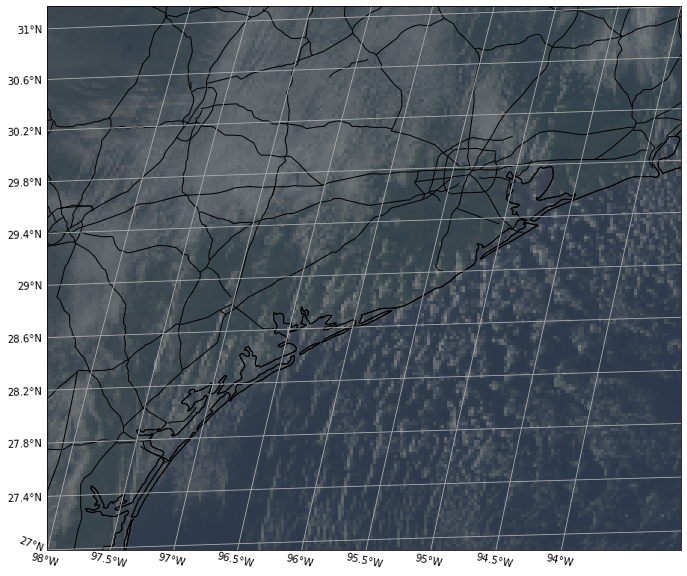

In [67]:
figme = plt.figure(figsize=[15,10])
ax = plt.subplot(projection=G_ABI.rgb.crs)
mp = ax.imshow(LG_ABI.rgb.TrueColor(), **LG_ABI.rgb.imshow_kwargs)
ax.coastlines()

ax.set_extent([-98, -94, 31, 27])

gl = ax.gridlines(xlocs=np.linspace(-98,-94,9), ylocs=np.linspace(27.,31.,11),draw_labels=True)

gl.top_labels = False
gl.right_labels = False
gl.left_labels = True


ax.add_feature(cartopy.feature.LAKES, zorder=0)
ax.add_feature(cartopy.feature.STATES)
ax.add_feature(cartopy.feature.NaturalEarthFeature('cultural', 'roads', '10m'), facecolor='none',
              edgecolor='k')

gl.top_labels = False
gl.right_labels = False
gl.left_labels = True
